In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Analysis") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-04-27 15:20:13,310 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Read all 2016 Data and Cache
 - [wiki](https://en.wikipedia.org/wiki/January_2016_United_States_blizzard)

In [24]:
df = spark.read.parquet(f"/taxi/dataset.parquet").filter("year = 2016")

In [25]:
import pyspark.sql.functions as f

In [26]:
data_2016 = (
    df.groupBy("month").count().orderBy("month")
).toPandas()

<AxesSubplot:title={'center':'Rides in 2016'}, xlabel='Month', ylabel='Rides'>

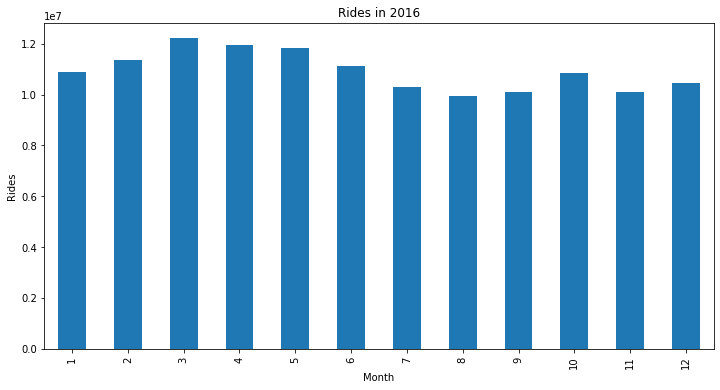

In [27]:
data_2016.plot(
    x='month', y='count', figsize=(12, 6), 
    title='Rides in 2016',
    legend=False,
    kind='bar',
    xlabel='Month',
    ylabel='Rides'
)

### January 2016

In [30]:
jan = df.filter("month = 01").withColumn('day', f.dayofmonth("pickup_datetime"))

In [31]:
jan.show(3)

+----+-----+-------------------+-------------------+---------------+-------------+------------+----------+-----------+------------+---+
|year|month|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|payment_type|tip_amount|trip_amount|total_amount|day|
+----+-----+-------------------+-------------------+---------------+-------------+------------+----------+-----------+------------+---+
|2016|    1|2016-01-07 16:16:04|2016-01-07 16:20:24|              1|      1.60934|           1|      1.45|        7.3|        8.75|  7|
|2016|    1|2016-01-21 15:22:35|2016-01-21 15:35:45|              2|     3.138213|           1|      2.26|       11.3|       13.56| 21|
|2016|    1|2016-01-17 20:23:13|2016-01-17 20:34:07|              1|     4.345218|           1|      2.45|       12.3|       14.75| 17|
+----+-----+-------------------+-------------------+---------------+-------------+------------+----------+-----------+------------+---+
only showing top 3 rows



In [32]:
data_jan = (
    sept_df.groupBy("day").count().orderBy("day")
).toPandas()

<AxesSubplot:title={'center':'Rides in Jan/2016'}, xlabel='Days', ylabel='Rides'>

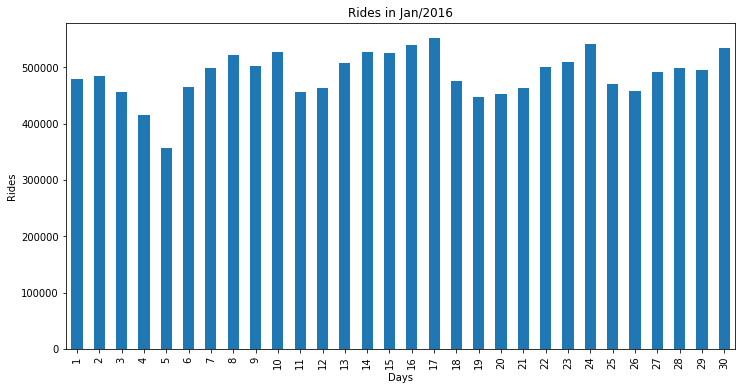

In [33]:
data_jan.plot(
    x='day', y='count', figsize=(12, 6), 
    title='Rides in Jan/2016',
    legend=False,
    kind='bar',
    xlabel='Days',
    ylabel='Rides'
)

### Stopping Spark 

In [34]:
spark.stop()